In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import requests                    # for "get" request to API
import json                        # parse json into a list
import datetime as dt

9870057291
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
def get_binance_bars(coin, base_currency, interval, startTime, endTime):
    '''
    download the data of the coins and store as .csv file
    '''
    symbol = str(coin+base_currency)
    #print(symbol)

    # In case of HTTP 5xx Error, or data is not fetched from the server, Try changing 'api1' in the URL to 'api2' or 'api3'

    url = "https://api1.binance.com/api/v3/klines"

    startTime = str(int(startTime.timestamp() * 1000))    ##############################

    endTime = str(int(endTime.timestamp() * 1000))
    limit = '4000'

    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}

    data = json.loads(requests.get(url, params = req_params).text)

    if isinstance(data , dict):
      coins_not_found.append(coin)
      print(f"Returned Invalid Code Error for Coin {coin}")
      return None

    else:
      if not data:
        coins_not_found.append(coin)
        print(f"Did not receieve OK response from Coinbase API for Coin {coin}")
        return None

      else:
        df = pd.DataFrame(data)

        # if (len(df.index) == 0):
        #     print(f"Did not receieve OK response from Coinbase API for Coin {coin}")
        #     return None

        df = df.iloc[:, 0:6]
        df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

        df.open      = df.open.astype("float")
        df.high      = df.high.astype("float")
        df.low       = df.low.astype("float")
        df.close     = df.close.astype("float")
        df.volume    = df.volume.astype("float")
        df['datetime'] = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]     # #############

        df.set_index('datetime', inplace= True)


        df.to_csv(f'{coin}.csv')

In [ ]:
# KEY PARAMETERS
start_date = dt.datetime(2021, 1, 1)
# end_date =  dt.datetime(to)
end_date =  dt.datetime(2022, 1, 25)
interval = '1d'
base_currency = 'USDT'

coins = ["BTC", "ETH", "USDC", "XRP", "ADA", "BNB","SOL"]

# Downloading the CSV files for the coins
for coin in coins:
  get_binance_bars(coin, base_currency, interval, start_date, end_date)

In [ ]:
df=pd.read_csv('ETH.csv')
print(df)

       datetime     open     high      low    close        volume
0    2021-01-01   736.42   749.00   714.29   728.91  6.751141e+05
1    2021-01-02   728.91   787.69   714.91   774.56  1.352619e+06
2    2021-01-03   774.44  1011.07   768.71   978.28  2.813604e+06
3    2021-01-04   978.33  1162.97   890.00  1041.43  4.245011e+06
4    2021-01-05  1041.45  1134.60   974.45  1099.56  2.706996e+06
5    2021-01-06  1100.16  1213.00  1057.26  1208.42  2.390137e+06
6    2021-01-07  1208.75  1289.00  1131.00  1224.87  1.972923e+06
7    2021-01-08  1224.86  1273.75  1065.00  1216.93  2.131173e+06
8    2021-01-09  1216.72  1304.37  1171.36  1276.00  1.448871e+06
9    2021-01-10  1276.00  1348.33  1170.00  1254.25  1.951179e+06
10   2021-01-11  1254.24  1260.00   915.00  1087.01  4.068785e+06
11   2021-01-12  1087.00  1150.02  1006.33  1050.16  2.302645e+06
12   2021-01-13  1050.36  1137.65   987.48  1129.89  1.564202e+06
13   2021-01-14  1129.79  1247.55  1086.70  1231.62  1.555737e+06
14   2021-

In [ ]:
# calculate simple moving average
# here taking close column and define window[i can adjust that but the standard is 20 day]
df['SMA']=df.close.rolling(window=20).mean()
df

,datetime,open,high,low,close,volume,SMA
0,2021-01-01,736.42,749.00,714.29,728.91,6.751141e+05,NaN
1,2021-01-02,728.91,787.69,714.91,774.56,1.352619e+06,NaN
2,2021-01-03,774.44,1011.07,768.71,978.28,2.813604e+06,NaN
3,2021-01-04,978.33,1162.97,890.00,1041.43,4.245011e+06,NaN
4,2021-01-05,1041.45,1134.60,974.45,1099.56,2.706996e+06,NaN
5,2021-01-06,1100.16,1213.00,1057.26,1208.42,2.390137e+06,NaN
6,2021-01-07,1208.75,1289.00,1131.00,1224.87,1.972923e+06,NaN
7,2021-01-08,1224.86,1273.75,1065.00,1216.93,2.131173e+06,NaN
8,2021-01-09,1216.72,1304.37,1171.36,1276.00,1.448871e+06,NaN
9,2021-01-10,1276.00,1348.33,1170.00,1254.25,1.951179e+06,NaN


In [ ]:
# calculate standard deviation
# we need to calculate upper and lower band
df['stddev']=df.close.rolling(window=20).std()
df

,datetime,open,high,low,close,volume,SMA,stddev
0,2021-01-01,736.42,749.00,714.29,728.91,6.751141e+05,NaN,NaN
1,2021-01-02,728.91,787.69,714.91,774.56,1.352619e+06,NaN,NaN
2,2021-01-03,774.44,1011.07,768.71,978.28,2.813604e+06,NaN,NaN
3,2021-01-04,978.33,1162.97,890.00,1041.43,4.245011e+06,NaN,NaN
4,2021-01-05,1041.45,1134.60,974.45,1099.56,2.706996e+06,NaN,NaN
5,2021-01-06,1100.16,1213.00,1057.26,1208.42,2.390137e+06,NaN,NaN
6,2021-01-07,1208.75,1289.00,1131.00,1224.87,1.972923e+06,NaN,NaN
7,2021-01-08,1224.86,1273.75,1065.00,1216.93,2.131173e+06,NaN,NaN
8,2021-01-09,1216.72,1304.37,1171.36,1276.00,1.448871e+06,NaN,NaN
9,2021-01-10,1276.00,1348.33,1170.00,1254.25,1.951179e+06,NaN,NaN


In [ ]:
# now lets defining the upper band [simple moving average plus two times by the waythis is also parameter]
# 20 days and two times the standard deviation
df['Upper']=df.SMA+2*df.stddev
df['Lower']=df.SMA-2*df.stddev

In [ ]:
df

,datetime,open,high,low,close,volume,SMA,stddev,Upper,Lower
0,2021-01-01,736.42,749.00,714.29,728.91,6.751141e+05,NaN,NaN,NaN,NaN
1,2021-01-02,728.91,787.69,714.91,774.56,1.352619e+06,NaN,NaN,NaN,NaN
2,2021-01-03,774.44,1011.07,768.71,978.28,2.813604e+06,NaN,NaN,NaN,NaN
3,2021-01-04,978.33,1162.97,890.00,1041.43,4.245011e+06,NaN,NaN,NaN,NaN
4,2021-01-05,1041.45,1134.60,974.45,1099.56,2.706996e+06,NaN,NaN,NaN,NaN
5,2021-01-06,1100.16,1213.00,1057.26,1208.42,2.390137e+06,NaN,NaN,NaN,NaN
6,2021-01-07,1208.75,1289.00,1131.00,1224.87,1.972923e+06,NaN,NaN,NaN,NaN
7,2021-01-08,1224.86,1273.75,1065.00,1216.93,2.131173e+06,NaN,NaN,NaN,NaN
8,2021-01-09,1216.72,1304.37,1171.36,1276.00,1.448871e+06,NaN,NaN,NaN,NaN
9,2021-01-10,1276.00,1348.33,1170.00,1254.25,1.951179e+06,NaN,NaN,NaN,NaN


In [ ]:
# df['Buy_signal']=np.where(df.Lower > df.close, True, False)
df['Buy_Signal']=np.where(df.Lower >= df.close,True, False)

In [ ]:
# df['Sell_Signal']=np.where(df.Upper <= df.close, True, False)
df['Sell_Signal']=np.where(df.Upper < df.close, True, False)

In [ ]:
df

,datetime,open,high,low,close,volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
0,2021-01-01,736.42,749.00,714.29,728.91,6.751141e+05,NaN,NaN,NaN,NaN,False,False
1,2021-01-02,728.91,787.69,714.91,774.56,1.352619e+06,NaN,NaN,NaN,NaN,False,False
2,2021-01-03,774.44,1011.07,768.71,978.28,2.813604e+06,NaN,NaN,NaN,NaN,False,False
3,2021-01-04,978.33,1162.97,890.00,1041.43,4.245011e+06,NaN,NaN,NaN,NaN,False,False
4,2021-01-05,1041.45,1134.60,974.45,1099.56,2.706996e+06,NaN,NaN,NaN,NaN,False,False
5,2021-01-06,1100.16,1213.00,1057.26,1208.42,2.390137e+06,NaN,NaN,NaN,NaN,False,False
6,2021-01-07,1208.75,1289.00,1131.00,1224.87,1.972923e+06,NaN,NaN,NaN,NaN,False,False
7,2021-01-08,1224.86,1273.75,1065.00,1216.93,2.131173e+06,NaN,NaN,NaN,NaN,False,False
8,2021-01-09,1216.72,1304.37,1171.36,1276.00,1.448871e+06,NaN,NaN,NaN,NaN,False,False
9,2021-01-10,1276.00,1348.33,1170.00,1254.25,1.951179e+06,NaN,NaN,NaN,NaN,False,False


In [ ]:
# remove all NAN values
df=df.dropna()
df

,datetime,open,high,low,close,volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
19,2021-01-20,1365.36,1407.93,1235.42,1376.99,2.219138e+06,1146.5750,169.514094,1485.603188,807.546812,False,False
20,2021-01-21,1376.72,1390.00,1086.00,1110.96,2.254165e+06,1165.6775,138.695387,1443.068275,888.286725,False,False
21,2021-01-22,1111.98,1273.79,1042.31,1232.62,2.020593e+06,1188.5805,104.254055,1397.088609,980.072391,False,False
22,2021-01-23,1232.61,1272.44,1195.90,1233.60,1.009545e+06,1201.3465,92.066992,1385.480485,1017.212515,False,False
23,2021-01-24,1233.46,1398.83,1220.00,1392.51,1.510880e+06,1218.9005,93.430985,1405.762469,1032.038531,False,False
24,2021-01-25,1392.19,1475.00,1293.69,1317.88,1.885441e+06,1229.8165,91.487484,1412.791468,1046.841532,False,False
25,2021-01-26,1317.60,1378.49,1244.56,1365.97,1.682924e+06,1237.6940,96.209229,1430.112458,1045.275542,False,False
26,2021-01-27,1366.54,1373.90,1207.00,1239.03,2.009772e+06,1238.4020,96.161981,1430.725962,1046.078038,False,False
27,2021-01-28,1238.93,1360.00,1217.23,1329.69,1.365270e+06,1244.0400,98.122404,1440.284807,1047.795193,False,False
28,2021-01-29,1329.44,1436.90,1285.35,1379.50,2.253963e+06,1249.2150,102.527140,1454.269279,1044.160721,False,False


In [ ]:
# set the date
df=df.set_index(pd.DatetimeIndex(df['datetime'].values))
df

,datetime,open,high,low,close,volume,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
2021-01-20,2021-01-20,1365.36,1407.93,1235.42,1376.99,2.219138e+06,1146.5750,169.514094,1485.603188,807.546812,False,False
2021-01-21,2021-01-21,1376.72,1390.00,1086.00,1110.96,2.254165e+06,1165.6775,138.695387,1443.068275,888.286725,False,False
2021-01-22,2021-01-22,1111.98,1273.79,1042.31,1232.62,2.020593e+06,1188.5805,104.254055,1397.088609,980.072391,False,False
2021-01-23,2021-01-23,1232.61,1272.44,1195.90,1233.60,1.009545e+06,1201.3465,92.066992,1385.480485,1017.212515,False,False
2021-01-24,2021-01-24,1233.46,1398.83,1220.00,1392.51,1.510880e+06,1218.9005,93.430985,1405.762469,1032.038531,False,False
2021-01-25,2021-01-25,1392.19,1475.00,1293.69,1317.88,1.885441e+06,1229.8165,91.487484,1412.791468,1046.841532,False,False
2021-01-26,2021-01-26,1317.60,1378.49,1244.56,1365.97,1.682924e+06,1237.6940,96.209229,1430.112458,1045.275542,False,False
2021-01-27,2021-01-27,1366.54,1373.90,1207.00,1239.03,2.009772e+06,1238.4020,96.161981,1430.725962,1046.078038,False,False
2021-01-28,2021-01-28,1238.93,1360.00,1217.23,1329.69,1.365270e+06,1244.0400,98.122404,1440.284807,1047.795193,False,False
2021-01-29,2021-01-29,1329.44,1436.90,1285.35,1379.50,2.253963e+06,1249.2150,102.527140,1454.269279,1044.160721,False,False


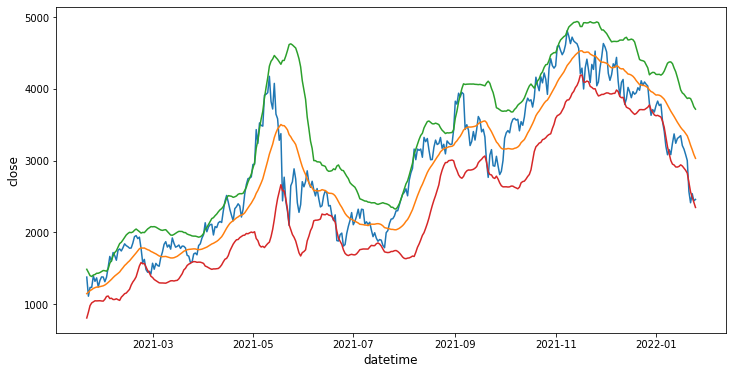

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df[['close','SMA','Upper','Lower']])
plt.xlabel('datetime',fontsize=12)
plt.ylabel('close',fontsize=12)
plt.show()

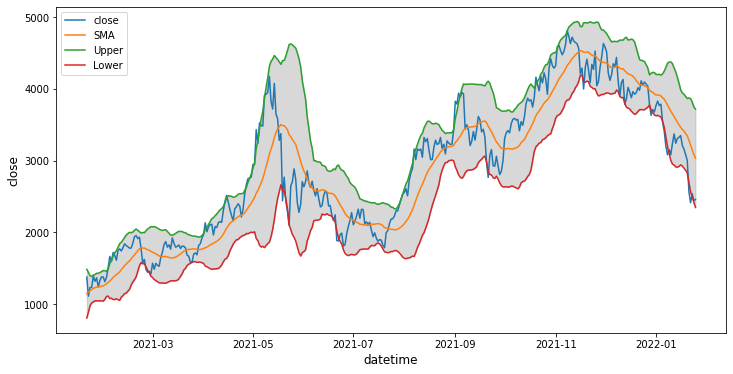

In [ ]:
# fill the area between upper and lower band
plt.figure(figsize=(12,6))
plt.plot(df[['close','SMA','Upper','Lower']])
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.xlabel('datetime',fontsize=12)
plt.ylabel('close',fontsize=12)
plt.legend(['close','SMA','Upper','Lower'])
plt.show()

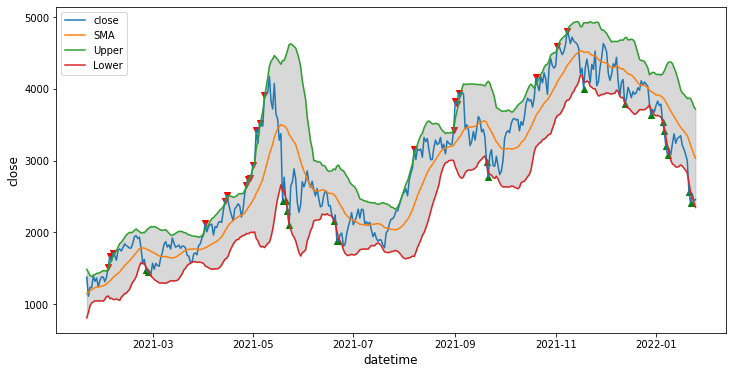

In [ ]:
# we want to plot a Buy_signals and selling signal
plt.figure(figsize=(12,6))
plt.plot(df[['close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].close,marker='^',color='g')
plt.scatter(df.index[df.Sell_Signal],df[df.Sell_Signal].close,marker='v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.xlabel('datetime',fontsize=12)
plt.ylabel('close',fontsize=12)
plt.legend(['close','SMA','Upper','Lower'])
plt.show()

Trading Strategy

In [ ]:
# remove subsequent of buying signal and selling signal
# buys=[]
# sells=[]
# we need a flag which is telling us if the position is open so we are just taking a variable here open_position and seeting that to False
# open_pos=False
# for i in range(len(df)):
  # if our lower column and then i which is just the row or the row number to be more specific so in the very first situation
  #we are just taking very first row then the second we are taking the second row and so on
  # if df.Lower[i] > df.close[i]:
    # if open_pos ==False:
      # buys.append(i)
      # open_pos = True
    # elif df.Upper[i] < df.close[i]:
      # if open_pos:
        # sells.append(i)
        # open_pos =False

In [ ]:
buys=[]
sells=[]
open_pos=False
for i in range(len(df)):
  if df.Lower[i] > df.close[i]:
    buys.append(i)
    open_pos==True
  elif df.Upper[i] <= df.close[i]:
    sells.append(i)
    open_pos=False

In [ ]:
# execute and printing buys
# a=buys[:1]
# a
a=buys[0::3]
a

[36, 121, 150, 243, 327, 351, 366]

In [ ]:
# b=sells[:1]
# b
b=sells[0::3]
b

[13, 72, 97, 101, 108, 224, 273]

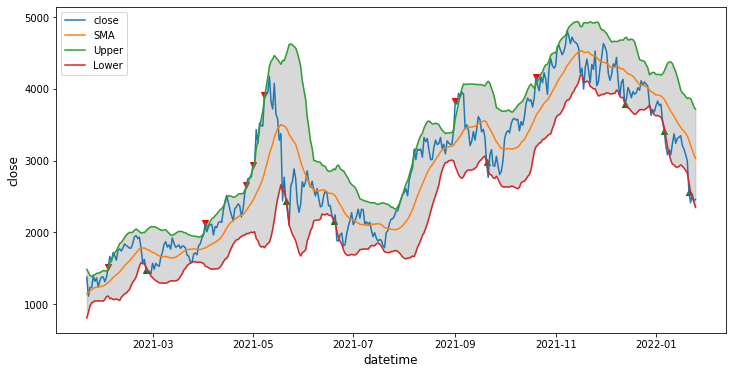

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df[['close','SMA','Upper','Lower']])
plt.scatter(df.iloc[a].index, df.iloc[a].close,marker='^',color='g')
plt.scatter(df.iloc[b].index, df.iloc[b].close,marker='v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.xlabel('datetime',fontsize=12)
plt.ylabel('close',fontsize=12)
plt.legend(['close','SMA','Upper','Lower'])
plt.show()

Backtest Strategy

In [ ]:
# lets take buys and sells
# axis=1 means getting columns
merged=pd.concat([df.iloc[buys].close,df.iloc[sells].close],axis=1)
merged

,close,close
2021-02-02,NaN,1511.87
2021-02-03,NaN,1664.49
2021-02-05,NaN,1719.19
2021-02-25,1481.75,NaN
2021-02-26,1444.59,NaN
2021-04-02,NaN,2133.69
2021-04-14,NaN,2432.60
2021-04-15,NaN,2514.04
2021-04-27,NaN,2666.13
2021-04-28,NaN,2748.24


In [ ]:
merged.columns=['Buys','Sells']
merged

,Buys,Sells
2021-02-02,NaN,1511.87
2021-02-03,NaN,1664.49
2021-02-05,NaN,1719.19
2021-02-25,1481.75,NaN
2021-02-26,1444.59,NaN
2021-04-02,NaN,2133.69
2021-04-14,NaN,2432.60
2021-04-15,NaN,2514.04
2021-04-27,NaN,2666.13
2021-04-28,NaN,2748.24


In [ ]:
# calculate the profit of those trades
# the profit of this trades is pretty straightforward
# i have selling price is buying price is equal to total profit
#  total profit= selling price-buying price
#                 __________________________
#                       buying price
totalprofit=merged.shift(-1).Sells-merged.Buys
totalprofit

2021-02-02        NaN
2021-02-03        NaN
2021-02-05        NaN
2021-02-25        NaN
2021-02-26     689.10
2021-04-02        NaN
2021-04-14        NaN
2021-04-15        NaN
2021-04-27        NaN
2021-04-28        NaN
2021-04-29        NaN
2021-05-01        NaN
2021-05-03        NaN
2021-05-05        NaN
2021-05-08        NaN
2021-05-19        NaN
2021-05-21        NaN
2021-05-22        NaN
2021-05-23        NaN
2021-06-19        NaN
2021-06-21        NaN
2021-06-22    1281.03
2021-08-07        NaN
2021-08-31        NaN
2021-09-01        NaN
2021-09-02        NaN
2021-09-03        NaN
2021-09-20        NaN
2021-09-21    1395.25
2021-10-20        NaN
2021-11-02        NaN
2021-11-08        NaN
2021-11-18        NaN
2021-12-13        NaN
2021-12-29        NaN
2022-01-05        NaN
2022-01-06        NaN
2022-01-07        NaN
2022-01-08        NaN
2022-01-21        NaN
2022-01-22        NaN
dtype: float64